In [2]:
# loading and reshaping data 

from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# labels
print(y_train)

# data
print(x_train.shape)
print(x_test.shape)

x_train = x_train.astype('float32') / 255 # 255 max rgb value
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(len(x_train), 28,28,1)
x_test = x_test.reshape(len(x_test), 28,28,1)

number_of_pixels = np.prod(x_train.shape[1:])

print(number_of_pixels)
input_dim = x_train.shape[1:]

print(input_dim)

[5 0 4 ... 5 6 8]
(60000, 28, 28)
(10000, 28, 28)
784
(28, 28, 1)


In [3]:
######################################## simple 2D autoencoder #################################################

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D , MaxPooling2D, Reshape, UpSampling2D,Attention
from tensorflow.keras.layers import Attention, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model # (template for architecture)


#........................................................................ encoder

# input layer
input_img = Input(shape=input_dim)

print(input_img.shape)

# encoder
print('...encoder.....')

conv1_layer = Conv2D(16, (3, 3), activation='relu', padding='same')
conv1_output = conv1_layer(input_img)

print(conv1_output.shape)

pool1_layer = MaxPooling2D((4, 4), padding='same')
pool1_output = pool1_layer (conv1_output)

print(pool1_output.shape)

encoded = pool1_output

latent_dim = encoded.shape[1:]
print(latent_dim)

#........................................................................ decoder

print('...decoder.....')
conv1_decoder_layer = Conv2D(16, (3, 3), activation='relu', padding='same')
conv1_decoder_output = conv1_decoder_layer(encoded)
print(conv1_decoder_output.shape)

pool1_decoder = UpSampling2D((4, 4))
upsample1_decoder_out  = pool1_decoder(conv1_decoder_output)
print(upsample1_decoder_out.shape)


conv2_decoder_layer = Conv2D(1, (3, 3), activation='relu', padding='same')
conv2_decoder_output = conv2_decoder_layer(upsample1_decoder_out)
print(conv2_decoder_output.shape)

decoded = conv2_decoder_output

(None, 28, 28, 1)
...encoder.....
(None, 28, 28, 16)
(None, 7, 7, 16)
(7, 7, 16)
...decoder.....
(None, 7, 7, 16)
(None, 28, 28, 16)
(None, 28, 28, 1)


In [4]:
simple_autoencoder = Model(input_img, decoded)
print(simple_autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
___________________________________________________________

In [5]:
from tensorflow.keras.optimizers import Adadelta
simple_autoencoder.compile(optimizer=Adadelta(learning_rate=1.0), loss='binary_crossentropy')

In [8]:
# Train model
simple_autoencoder.fit(x_train, x_train,  # the target is the same input data!
                       epochs=50, 
                       batch_size=256, 
                       shuffle=True, 
                       validation_data=(x_test, x_test)) 

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1842 - val_loss: 0.2007
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1469 - val_loss: 0.1392
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1393 - val_loss: 0.1311
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1329 - val_loss: 0.1258
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1279 - val_loss: 0.1328
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1287 - val_loss: 0.2447
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1229 - val_loss: 0.1191
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1219 - val_loss: 0.1185
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1221 - val_loss: 0.1159
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1184 - val_loss: 0.1153

In [ ]:
######################################    visualizing output of simple autoancoder ######################################

(10000, 28, 28, 1)
(28, 28)
(28, 28)


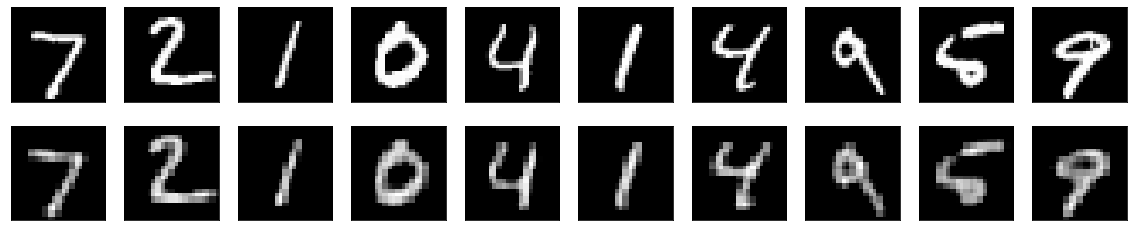

In [10]:
import matplotlib.pyplot as plt

# Predict digits
decoded_imgs = simple_autoencoder.predict(x_test)
print(decoded_imgs.shape)

im = x_test[0].reshape(28, 28)
print(im.shape)

im = decoded_imgs[0].reshape(28, 28)
print(im.shape)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [11]:


################################################ AUTOENCODER + ATTENTION ################################################





In [12]:
# loading and reshaping data

from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# labels
print(y_train)

# data
print(x_train.shape)
print(x_test.shape)

x_train = x_train.astype('float32') / 255 # 255 max rgb value
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(len(x_train), 28,28,1)
x_test = x_test.reshape(len(x_test), 28,28,1)

number_of_pixels = np.prod(x_train.shape[1:])

print(number_of_pixels)
input_dim = x_train.shape[1:]

print(input_dim)

[5 0 4 ... 5 6 8]
(60000, 28, 28)
(10000, 28, 28)
784
(28, 28, 1)


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D , MaxPooling2D, Reshape, UpSampling2D,Attention
from tensorflow.keras.layers import Attention, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model # (template for architecture)


############################################### encoder block: layers before attention layer
# input layer
input_img = Input(shape=input_dim)
print(input_img.shape)


# encoder
print('...encoder.....')

conv1_layer = Conv2D(16, (3, 3), activation='relu', padding='same')
conv1_output = conv1_layer(input_img)

print(conv1_output.shape)

(None, 28, 28, 1)
...encoder.....
(None, 28, 28, 16)


In [14]:

############################################### encoder block: Attention 

print ('.................ATTENTION ...........................')

query = conv1_output
value = conv1_output

query_value_attention = Attention()([query, value])

print('attention output shape' + str(query_value_attention))

#Concatenate query and document encodings to produce a DNN input layer.
final_out_attention = Concatenate(axis=-1)([query, query_value_attention])

print('final_out_attentio' + str(final_out_attention))


.................ATTENTION ...........................
attention output shapeTensor("attention/Identity:0", shape=(None, 28, 28, 16), dtype=float32)
final_out_attentioTensor("concatenate/Identity:0", shape=(None, 28, 28, 32), dtype=float32)


In [15]:

############################################### encoder block: layers after attention layer

pool1_layer = MaxPooling2D((4, 4), padding='same')
pool1_output = pool1_layer (final_out_attention)

print(pool1_output.shape)

encoded = pool1_output

latent_dim = encoded.shape[1:]
print(latent_dim)

(None, 7, 7, 32)
(7, 7, 32)


In [16]:

############################################### decoder block

print('...decoder.....')
conv1_decoder_layer = Conv2D(16, (3, 3), activation='relu', padding='same')
conv1_decoder_output = conv1_decoder_layer(encoded)
print(conv1_decoder_output.shape)

pool1_decoder = UpSampling2D((4, 4))
upsample1_decoder_out  = pool1_decoder(conv1_decoder_output)
print(upsample1_decoder_out.shape)


conv2_decoder_layer = Conv2D(1, (3, 3), activation='relu', padding='same')
conv2_decoder_output = conv2_decoder_layer(upsample1_decoder_out)
print(conv2_decoder_output.shape)


decoded = conv2_decoder_output

...decoder.....
(None, 7, 7, 16)
(None, 28, 28, 16)
(None, 28, 28, 1)


In [17]:
attention_autoencoder = Model(input_img, decoded)
print(attention_autoencoder.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 16)   160         input_3[0][0]                    
__________________________________________________________________________________________________
attention (Attention)           (None, 28, 28, 16)   0           conv2d_3[0][0]                   
                                                                 conv2d_3[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 28, 32)   0           conv2d_3[0][0]             

In [18]:
from tensorflow.keras.optimizers import Adadelta
attention_autoencoder.compile(optimizer=Adadelta(learning_rate=1.0), loss='binary_crossentropy')

In [21]:
attention_autoencoder.fit(x_train, x_train,  # the target is the same input data!
                       epochs=50, 
                       batch_size=256, 
                       shuffle=True, 
                       validation_data=(x_test, x_test)) 

Epoch 1/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1781 - val_loss: 0.1413
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1423 - val_loss: 0.1289
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1298 - val_loss: 0.1257
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1286 - val_loss: 0.1206
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1242 - val_loss: 0.2665
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1214 - val_loss: 0.1170
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1196 - val_loss: 0.1149
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1179 - val_loss: 0.1164
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1180 - val_loss: 0.1169
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1161 - val_lo

In [ ]:
####################################    visualizing output of attention autoancoder ###################################

(10000, 28, 28, 1)
(28, 28)


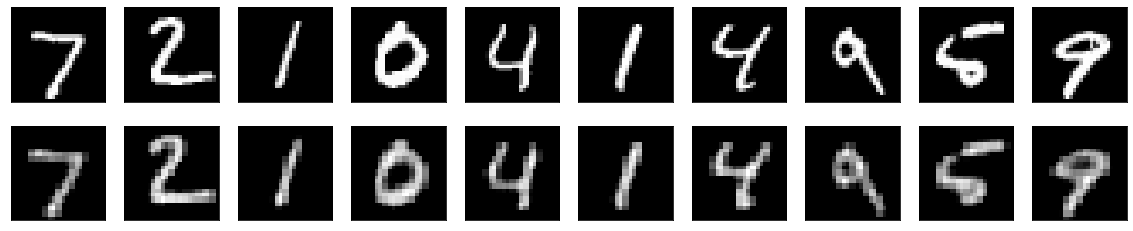

In [22]:
import matplotlib.pyplot as plt

# Predict digits
decoded_imgs = attention_autoencoder.predict(x_test)
print(decoded_imgs.shape)
im = x_test[0].reshape(28, 28)
print(im.shape)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
####################################    visualizing attention layer ###################################

In [28]:
# To visualize attention output

model = attention_autoencoder
layer_name = 'attention'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_test)

attention_output = np.mean(intermediate_output, axis = 3)
print(attention_output.shape)

(10000, 28, 28)


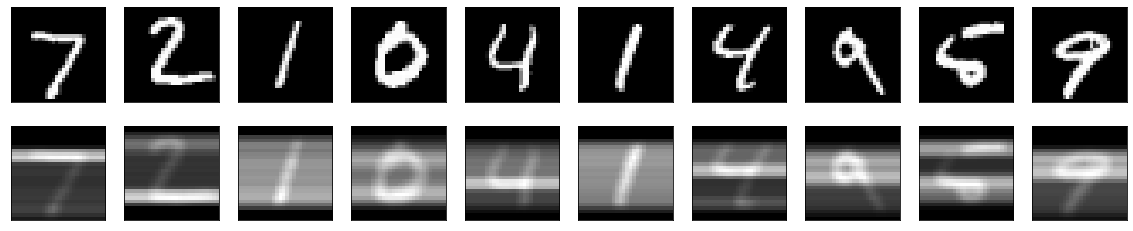

In [29]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(attention_output[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()